<center> <h1>Universidad Nacional de San Agustín de Arequipa</h1> </center> 
<center> <h1>Escuela Profesional de Ingeniería de Telecomunicaciones</h1> </center> 

<center> <h1> </h1> </center> 

<center><img src="https://user-images.githubusercontent.com/19308295/115939517-f1c6fe80-a463-11eb-989c-812ab4942586.png" width="380" height="4200"></center>

<center> <h2>Ingeniero Renzo Bolivar - Docente DAIE</h2> </center> 

<center> <h1>Curso : Computación 2</h1> </center> 

![linea 1](https://user-images.githubusercontent.com/19308295/115926252-2b8a0c00-a448-11eb-9d9c-b43beaf0ff68.png)

<center> <h2>Integrantes: </h2> </center> 

<h1>

- Butrón Benites Ricardo Alonso

- Lupaca Sancja Damaris Dana

- Quea Carlo Kevin Baltazar

- Zapata Mestas Emmauel Zapata

</h1> 

## Librerías a utilizar

In [1]:
#Se importan la librerias a utilizar
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt

## LINK DATOS
https://www.kaggle.com/datasets/luisdiegofv97/imdb-dataset-of-50k-movie-reviews-spanish

## Importación de datos

In [5]:
dataset = pd.read_csv("data/tabla_final.csv")

In [7]:
dataset.head()

,clave,fecha,almacenamiento,temperatura,humedad,precipitacion,tipo_precip,indice_uv,soleado,nublado,parc_nublado,lluvia_soleado,lluvia_nublado,lluvia_parc_nublado
0,AGZCH,01/01/2020,79.10,14.7,65.0,0.0,0,6,1,0,0,0,0,0
1,AOBSO,01/01/2020,1683.92,14.7,65.0,0.0,0,6,1,0,0,0,0,0
2,ARCSO,01/01/2020,501.46,14.7,65.0,0.0,0,6,1,0,0,0,0,0
3,ARLSO,01/01/2020,18.42,14.7,65.0,0.0,0,6,1,0,0,0,0,0
4,CHTSO,01/01/2020,13.17,14.7,65.0,0.0,0,6,1,0,0,0,0,0


In [9]:
dataset.tail()

,clave,fecha,almacenamiento,temperatura,humedad,precipitacion,tipo_precip,indice_uv,soleado,nublado,parc_nublado,lluvia_soleado,lluvia_nublado,lluvia_parc_nublado
11528,CHTSO,26/06/2023,2.235,35.7,21.2,0.0,0,8,0,0,1,0,0,0
11529,IRASO,26/06/2023,0.295,35.7,21.2,0.0,0,8,0,0,1,0,0,0
11530,LCDSO,26/06/2023,547.737,35.7,21.2,0.0,0,8,0,0,1,0,0,0
11531,PECSO,26/06/2023,959.204,35.7,21.2,0.0,0,8,0,0,1,0,0,0
11532,PMOSO,26/06/2023,25.044,35.7,21.2,0.0,0,8,0,0,1,0,0,0


`unos=positivo y dos=negativo`

## Exploración de datos

### Tamaño Dataframe

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11533 entries, 0 to 11532
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   clave                11533 non-null  object 
 1   fecha                11533 non-null  object 
 2   almacenamiento       11533 non-null  float64
 3   temperatura          11533 non-null  float64
 4   humedad              11533 non-null  float64
 5   precipitacion        11533 non-null  float64
 6   tipo_precip          11533 non-null  int64  
 7   indice_uv            11533 non-null  int64  
 8   soleado              11533 non-null  int64  
 9   nublado              11533 non-null  int64  
 10  parc_nublado         11533 non-null  int64  
 11  lluvia_soleado       11533 non-null  int64  
 12  lluvia_nublado       11533 non-null  int64  
 13  lluvia_parc_nublado  11533 non-null  int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 1.2+ MB


In [16]:
dataset.dtypes

clave                   object
fecha                   object
almacenamiento         float64
temperatura            float64
humedad                float64
precipitacion          float64
tipo_precip              int64
indice_uv                int64
soleado                  int64
nublado                  int64
parc_nublado             int64
lluvia_soleado           int64
lluvia_nublado           int64
lluvia_parc_nublado      int64
dtype: object

In [18]:
dataset.shape

(11533, 14)

In [20]:
dataset.count()

clave                  11533
fecha                  11533
almacenamiento         11533
temperatura            11533
humedad                11533
precipitacion          11533
tipo_precip            11533
indice_uv              11533
soleado                11533
nublado                11533
parc_nublado           11533
lluvia_soleado         11533
lluvia_nublado         11533
lluvia_parc_nublado    11533
dtype: int64

In [22]:
dataset.isnull().sum()

clave                  0
fecha                  0
almacenamiento         0
temperatura            0
humedad                0
precipitacion          0
tipo_precip            0
indice_uv              0
soleado                0
nublado                0
parc_nublado           0
lluvia_soleado         0
lluvia_nublado         0
lluvia_parc_nublado    0
dtype: int64

In [24]:
dataset.columns

Index(['clave', 'fecha', 'almacenamiento', 'temperatura', 'humedad',
       'precipitacion', 'tipo_precip', 'indice_uv', 'soleado', 'nublado',
       'parc_nublado', 'lluvia_soleado', 'lluvia_nublado',
       'lluvia_parc_nublado'],
      dtype='object')

In [26]:
dataset['lluvia_parc_nublado'].unique()

array([0, 1], dtype=int64)

In [28]:
dataset.describe()



,almacenamiento,temperatura,humedad,precipitacion,tipo_precip,indice_uv,soleado,nublado,parc_nublado,lluvia_soleado,lluvia_nublado,lluvia_parc_nublado
count,11533.000000,11533.000000,11533.000000,11533.000000,11533.000000,11533.000000,11533.000000,11533.000000,11533.000000,11533.000000,11533.000000,11533.000000
mean,422.626345,24.655103,42.976580,0.642634,0.165525,8.302176,0.462759,0.017948,0.392873,0.006243,0.008584,0.111593
std,626.091083,6.732079,15.277602,3.719947,0.371670,1.597451,0.498633,0.132770,0.488410,0.078769,0.092256,0.314878
min,0.000000,9.600000,6.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.470000,18.300000,31.800000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.110000,25.100000,42.700000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,657.750000,30.700000,53.300000,0.000000,0.000000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2823.350000,37.700000,88.500000,58.200000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Preparación de los datos para Árboles de Decisión Clasificación 

Para este ejemplo vamos a implementar un clasificador Árboles de Decisión Clasificación, para este algoritmo se requiere todas las variables independientes, para nuestro caso serán las variables **Caracteristica**.

Ahora vamos a proceder a definir las variables de “X” y “y” que vamos emplear en nuestro modelo.

Para “X” vamos a utilizar todas las variables de caracteristicas, por lo que la igualamos a las primeras 4 columnas.

In [33]:
dataset.head()

,clave,fecha,almacenamiento,temperatura,humedad,precipitacion,tipo_precip,indice_uv,soleado,nublado,parc_nublado,lluvia_soleado,lluvia_nublado,lluvia_parc_nublado
0,AGZCH,01/01/2020,79.10,14.7,65.0,0.0,0,6,1,0,0,0,0,0
1,AOBSO,01/01/2020,1683.92,14.7,65.0,0.0,0,6,1,0,0,0,0,0
2,ARCSO,01/01/2020,501.46,14.7,65.0,0.0,0,6,1,0,0,0,0,0
3,ARLSO,01/01/2020,18.42,14.7,65.0,0.0,0,6,1,0,0,0,0,0
4,CHTSO,01/01/2020,13.17,14.7,65.0,0.0,0,6,1,0,0,0,0,0


In [35]:
caracteristica = dataset[['lluvia_parc_nublado']]
caracteristica

,lluvia_parc_nublado
0,0
1,0
2,0
3,0
4,0
...,...
11528,0
11529,0
11530,0
11531,0


In [37]:
# verificamos los valores de la columna caracteristica
dataset['parc_nublado'].unique()

array([0, 1], dtype=int64)

In [39]:
#Seleccionamos todas las columnas de carasteristicas
X = dataset.iloc[:, 3:13]

In [41]:
print(X)

       temperatura  humedad  precipitacion  tipo_precip  indice_uv  soleado  \
0             14.7     65.0            0.0            0          6        1   
1             14.7     65.0            0.0            0          6        1   
2             14.7     65.0            0.0            0          6        1   
3             14.7     65.0            0.0            0          6        1   
4             14.7     65.0            0.0            0          6        1   
...            ...      ...            ...          ...        ...      ...   
11528         35.7     21.2            0.0            0          8        0   
11529         35.7     21.2            0.0            0          8        0   
11530         35.7     21.2            0.0            0          8        0   
11531         35.7     21.2            0.0            0          8        0   
11532         35.7     21.2            0.0            0          8        0   

       nublado  parc_nublado  lluvia_soleado  lluvi

Por su parte, “y” será igual a los datos correspondientes a “etiquetas” por lo que igualamos esta variable a la ultima columna.

In [44]:
#Defino los datos correspondientes a las etiquetas
y = dataset['lluvia_parc_nublado']


In [46]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
11528    0
11529    0
11530    0
11531    0
11532    0
Name: lluvia_parc_nublado, Length: 11533, dtype: int64


Recuerda que “y” cuenta con una sola columna con solamente ceros y unos corresponden a lluvia nublado o sin lluvia nublada respectivamente

## Implementación de Árboles de Decisión Clasificación

Definido “X” y “y” ya podemos realizar la separación correspondiente a los datos de prueba y entrenamiento para ello importamos la respectiva librería y procedemos a utilizar train_test_split para separar los datos.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo.

In [54]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Seguidamente definimos el algoritmo, entonces decimos desde skelarn.tree importamos DecisionTreeClasiffier. Acá lo que indicamos es que desde el modulo de árboles de skelearn, vamos a importar el algoritmo de árboles de decisión clasificación, recuerda que ese algoritmo también funciona para problemas de regresión.

In [57]:
#Arboles de decisión
algoritmo_w = DecisionTreeClassifier(criterion='entropy')

Ahora definimos el algoritmo y lo configuramos para crear el modelo y entrenarlo. En este caso el único parámetro que vamos a configurar es el referente a “criterion” que se refiere a la medida de selección. Por defecto este parámetro viene configurado con el índice Gini pero para nuestro ejercicio lo voy a cambiar por “entropy” o entropía en español. Para entender mejor esto te recomiendo que buques la información publicada sobre la librería scikit learn para este algoritmo.

Definido esto ahora entrenamos el algoritmo, utilizando la instrucción fit() junto con los datos de entrenamiento separados previamente.

In [60]:
#Entreno el modelo
algoritmo_w.fit(X_train, y_train)
print(algoritmo_w)

DecisionTreeClassifier(criterion='entropy')


## Verificación del modelo desarrollado

A llegado el momento de verificar que tan preciso es el modelo desarrollado para ello utilizamos modulo `score` de los Datos de Prueba.

In [64]:
precision = algoritmo_w.score(X_test, y_test)
print('Precisión del modelo Datos Prueba: ')
print(precision)

Precisión del modelo Datos Prueba: 
1.0


El resultado de este calculo es de 0,966 un valor bastante aceptable.

Con esto podemos concluir que con este algoritmo también podemos obtener muy buenos resultados con este conjunto de datos. Ya queda de tu parte si deseas mejorarlo y ver si es posible obtener algo más preciso, para ello puedes modificar los datos de la configuración del algoritmo, por ejemplo cambiando la medida de selección.

In [67]:
precision2=algoritmo_w.score(X_train, y_train)
print('Precisión del modelo Datos Entrenamiento: ')
print (precision2)

Precisión del modelo Datos Entrenamiento: 
1.0


**eso se llama SOBREAJUSTE**

## Gráficamos nuestro Árbol

Importamos Librerias para graficar

instalar `conda install -c anaconda graphviz`

instalar `conda install -c conda-forge python-graphviz`

In [73]:
!pip install graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import matplotlib.pyplot as plt

Generamos archivo `.dot` que contiene la grafica 

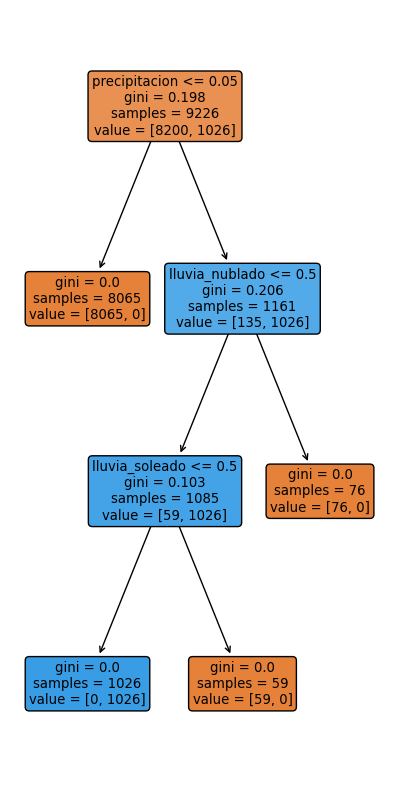

In [95]:
plt.figure(figsize=(5, 10))
plot_tree(algoritmo_w, filled=True, feature_names=X.columns, rounded=True)
plt.show()

Creamos la gráfica

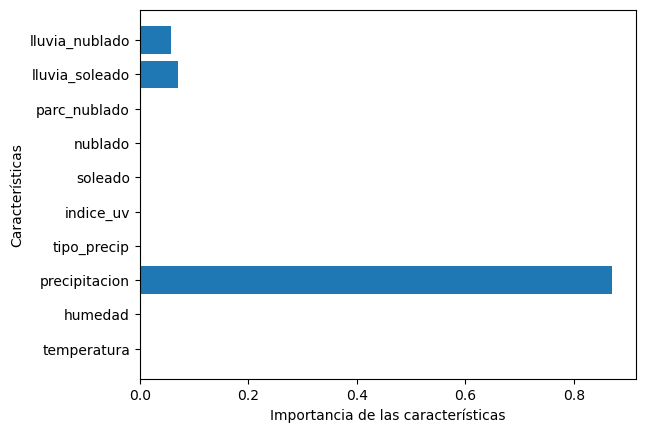

In [77]:
caract = X.shape[1]
plt.barh(range(caract), algoritmo_w.feature_importances_)
plt.yticks(np.arange(caract),('temperatura','humedad','precipitacion', 'tipo_precip',
                               'indice_uv','soleado', 'nublado', 'parc_nublado', 'lluvia_soleado', 'lluvia_nublado'))
plt.xlabel("Importancia de las características")
plt.ylabel("Características")
plt.show()


## Volvemos a entrenar el modelo con 3 niveles evitando sobreajuste

In [79]:
#Arboles de decisión
algoritmo_w = DecisionTreeClassifier(max_depth=3)

In [80]:
#Entreno el modelo
algoritmo_w.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [81]:
precision = algoritmo_w.score(X_test, y_test)
print("Precisión del modelo Datos Prueba:")
print(precision)


Precisión del modelo Datos Prueba:
1.0


In [82]:
precision2 = algoritmo_w.score(X_train, y_train)
print("Precisión del modelo Datos Entrenamiento:")
print(precision2)

Precisión del modelo Datos Entrenamiento:
1.0


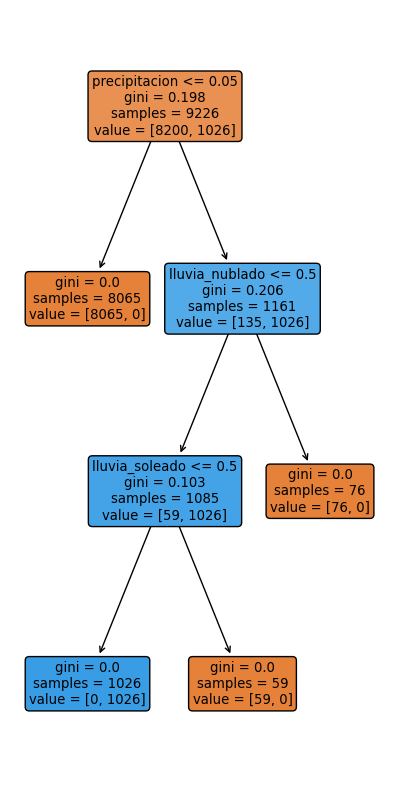

In [97]:
plt.figure(figsize=(5, 10))
plot_tree(algoritmo_w, filled=True, feature_names=X.columns, rounded=True)
plt.show()